# TMA 07 - Modelling Report
### [Traffic Signs Manual](https://www.gov.uk/government/publications/traffic-signs-manual)

----
&nbsp;
Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Data <a class="anchor" id="section-1"></a>


----
&nbsp;
### 90 Bars

#### Table 6-1 DataFrame
Spacing of bars on main carriageway pg, 73 of the above source

Data copied & pasted to .csv file `90_bars`

In [2]:
markings = pd.read_csv('90_bars.csv')
markings = markings.iloc[::-1]
markings = markings.sort_values(by='distance_from_D1')
print("The '90 Bars' DataFrame")
markings.head()

The '90 Bars' DataFrame


,bar_number,distance_from_D1
0,D1,0.00
1,D2,2.75
2,D3,5.50
3,D4,8.25
4,D5,11.05


We need to reverse the order of the table in [Traffic Signs Manual](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/773421/traffic-signs-manual-chapter-05.pdf) in accordance with our model

- D90 is now D1 etc

In [3]:
distances = markings['distance_from_D1'].tolist()
distances.reverse()
new_distances = [0]
for i in range(1, len(distances)):
    distance = round(distances[0] - distances[i], 2)
    new_distances.append(distance)

markers = markings['bar_number'].tolist()

In [4]:
ninety_bars = pd.DataFrame({'bar_number': markers, 'distance_from_D1': new_distances})
ninety_bars.head()

,bar_number,distance_from_D1
0,D1,0.00
1,D2,7.70
2,D3,15.35
3,D4,23.05
4,D5,30.75


----
&nbsp;
### 45 Bars

#### Table 6-2 DataFrame
Spacing of bars on slip road pg, 73 of the above source
Data copied & pasted to .csv file `45_bars`

In [5]:
markings2 = pd.read_csv('45_bars.csv')
markings2 = markings2.iloc[::-1]
markings2 = markings2.sort_values(by='distance_from_D1')
print("The '45 bar markings' DataFrame")
markings2.head()

The '45 bar markings' DataFrame


,bar_number,distance_from_D1
0,D1,0.00
1,D2,2.75
2,D3,5.55
3,D4,8.45
4,D5,11.35


We reverse
- D45 is now D1 etc

In [6]:
distances2 = markings2['distance_from_D1'].tolist()
distances2.reverse()
new_distances2 = [0]
for i in range(1, len(distances2)):
    distance2 = round(distances2[0] - distances2[i], 2)
    new_distances2.append(distance2)

markers2 = markings2['bar_number'].tolist()

In [7]:
fortyfive_bars = pd.DataFrame({'bar_number': markers2, 'distance_from_D1': new_distances2})
fortyfive_bars.head()

,bar_number,distance_from_D1
0,D1,0.0
1,D2,7.7
2,D3,15.4
3,D4,22.6
4,D5,29.3


----

## Our Model <a class="anchor" id="section-2"></a>

----

#### Equations of Motion
&nbsp;
constant accelerated motion in one dimension

$$a=a_{0}$$
$$v=u+a_{0} t$$
$$x=x_{0}+ut+\frac{1}{2}a_{0} t^{2}$$
$$v^{2}=u^{2}+2a_{0}D$$

----
&nbsp;
### Import Functions from `functions.py`

In [8]:
import functions

#### Functions;

- `metres_per_second()` - takes initial and final velocity in miles per hour and returns metres per second
- `calculate_distances()` - takes ($u$, $v$, $D$, $n$, thinking_time(seconds), default is 0.0, use_thinking_distance(Bool), default is False)
- `distance_dk()` - takes a list and returns absolute value $d_{k}$ between each $D_n$
- `plot_graph_dk()` takes model and real_world lists as input, returns graph with distance $d_k$ on $y$-axis
- `plot_subgraphs_dk()` - takes real_world and model with thinking time vs. no thinking time, returns side-by-side plots with $d_k$ on $y$-axis
- `velocity_time_graph()` - same parameters as `calculate_distances` returns velocity/time graph
- `distance_time_graph()` - same parameters as `calculate_distances` returns distance/time graph and list of vectors, $[t, D_n]$
- `dataframe()` - creates a dataframe of the real world and model; thinking & no thinking - requires 3 lists
- `stats()` - Runs summary statistics and produces a box plot on the DataFrame above

In [9]:
# Find u and v values in metres per second
functions.metres_per_second(70, 30)

70 mph is 31.293 metres per second
30 mph is 13.411 metres per second


----
&nbsp;
### Main road model, $D=403.95$ & $n=90$

In [10]:
no_thinking_90 = functions.calculate_distances(u=31.293, v=13.411, D=403.95, n=90)

In [11]:
print(no_thinking_90)

[0.0, 6.334, 12.627, 18.879, 25.091, 31.262, 37.391, 43.481, 49.529, 55.536, 61.503, 67.429, 73.314, 79.159, 84.962, 90.725, 96.447, 102.128, 107.768, 113.368, 118.926, 124.444, 129.922, 135.358, 140.753, 146.108, 151.422, 156.695, 161.928, 167.119, 172.27, 177.38, 182.449, 187.477, 192.465, 197.412, 202.318, 207.183, 212.007, 216.791, 221.533, 226.235, 230.896, 235.517, 240.096, 244.635, 249.133, 253.59, 258.007, 262.382, 266.717, 271.011, 275.264, 279.477, 283.648, 287.779, 291.869, 295.918, 299.926, 303.894, 307.821, 311.707, 315.552, 319.356, 323.12, 326.843, 330.525, 334.166, 337.766, 341.326, 344.845, 348.323, 351.76, 355.156, 358.512, 361.827, 365.101, 368.334, 371.526, 374.678, 377.789, 380.859, 383.888, 386.876, 389.824, 392.731, 395.597, 398.422, 401.206, 403.95]


In [12]:
# Highway code default of 0.67 seconds of thinking time
# Apply this thinking time in this iteration
thinking_90 = functions.calculate_distances(u=31.293, v=13.411, D=403.95, n=90, thinking_time=0.67, use_thinking_distance=True)

In [13]:
print(thinking_90)

[0, 6.989, 13.978, 20.966, 27.18, 33.353, 39.484, 45.574, 51.622, 57.629, 63.594, 69.518, 75.4, 81.242, 87.041, 92.799, 98.516, 104.192, 109.826, 115.418, 120.969, 126.479, 131.947, 137.374, 142.759, 148.103, 153.406, 158.667, 163.887, 169.065, 174.202, 179.297, 184.351, 189.364, 194.335, 199.265, 204.153, 209.0, 213.805, 218.569, 223.292, 227.973, 232.613, 237.211, 241.768, 246.283, 250.757, 255.19, 259.581, 263.931, 268.239, 272.506, 276.731, 280.916, 285.058, 289.159, 293.219, 297.237, 301.214, 305.15, 309.044, 312.896, 316.708, 320.477, 324.206, 327.892, 331.538, 335.142, 338.705, 342.226, 345.706, 349.144, 352.541, 355.896, 359.21, 362.483, 365.714, 368.904, 372.052, 375.159, 378.225, 381.249, 384.231, 387.173, 390.072, 392.931, 395.748, 398.523, 401.257, 403.95]


----
&nbsp;
### Slip road model, $D=199.30$ & $n=45$

In [14]:
no_thinking_45 = functions.calculate_distances(u=31.293, v=13.411, D=199.30, n=45)

In [15]:
print(no_thinking_45)

[0.0, 6.3, 12.518, 18.654, 24.707, 30.678, 36.566, 42.372, 48.096, 53.737, 59.296, 64.773, 70.167, 75.479, 80.709, 85.856, 90.921, 95.903, 100.803, 105.621, 110.357, 115.01, 119.58, 124.069, 128.475, 132.798, 137.04, 141.199, 145.275, 149.27, 153.181, 157.011, 160.758, 164.423, 168.005, 171.505, 174.923, 178.258, 181.511, 184.682, 187.77, 190.776, 193.7, 196.541, 199.3]


In [16]:
# Highway code default of 0.67 seconds of thinking time
# Apply this thinking time in this iteration
thinking_45 = functions.calculate_distances(u=31.293, v=13.411, D=199.30, n=45, thinking_time=0.67, use_thinking_distance=True)

In [17]:
print(thinking_45)

[0, 6.989, 13.978, 20.966, 27.013, 32.976, 38.853, 44.645, 50.353, 55.976, 61.513, 66.966, 72.334, 77.618, 82.816, 87.929, 92.958, 97.902, 102.76, 107.534, 112.223, 116.828, 121.347, 125.782, 130.131, 134.396, 138.576, 142.671, 146.681, 150.606, 154.446, 158.202, 161.873, 165.458, 168.959, 172.375, 175.706, 178.953, 182.114, 185.19, 188.182, 191.089, 193.911, 196.648, 199.3]


----
&nbsp;
#### Absolute values of distance $d_k$ between each bar $D_{n}$

#### Main road, $n=90$
&nbsp;
No thinking time

In [18]:
dk_90_no_thinking = functions.distance_dk(no_thinking_90)
print(f"Model, 90 bars, NO Thinking time:\n\n{dk_90_no_thinking}")

Model, 90 bars, NO Thinking time:

[6.334, 6.293, 6.252, 6.212, 6.171, 6.129, 6.09, 6.048, 6.007, 5.967, 5.926, 5.885, 5.845, 5.803, 5.763, 5.722, 5.681, 5.64, 5.6, 5.558, 5.518, 5.478, 5.436, 5.395, 5.355, 5.314, 5.273, 5.233, 5.191, 5.151, 5.11, 5.069, 5.028, 4.988, 4.947, 4.906, 4.865, 4.824, 4.784, 4.742, 4.702, 4.661, 4.621, 4.579, 4.539, 4.498, 4.457, 4.417, 4.375, 4.335, 4.294, 4.253, 4.213, 4.171, 4.131, 4.09, 4.049, 4.008, 3.968, 3.927, 3.886, 3.845, 3.804, 3.764, 3.723, 3.682, 3.641, 3.6, 3.56, 3.519, 3.478, 3.437, 3.396, 3.356, 3.315, 3.274, 3.233, 3.192, 3.152, 3.111, 3.07, 3.029, 2.988, 2.948, 2.907, 2.866, 2.825, 2.784, 2.744]


Thinking time

In [19]:
dk_90_thinking = functions.distance_dk(thinking_90)
print(f"Model, 90 bars + thinking time parameter:\n\n{dk_90_thinking}")

Model, 90 bars + thinking time parameter:

[6.989, 6.989, 6.988, 6.214, 6.173, 6.131, 6.09, 6.048, 6.007, 5.965, 5.924, 5.882, 5.842, 5.799, 5.758, 5.717, 5.676, 5.634, 5.592, 5.551, 5.51, 5.468, 5.427, 5.385, 5.344, 5.303, 5.261, 5.22, 5.178, 5.137, 5.095, 5.054, 5.013, 4.971, 4.93, 4.888, 4.847, 4.805, 4.764, 4.723, 4.681, 4.64, 4.598, 4.557, 4.515, 4.474, 4.433, 4.391, 4.35, 4.308, 4.267, 4.225, 4.185, 4.142, 4.101, 4.06, 4.018, 3.977, 3.936, 3.894, 3.852, 3.812, 3.769, 3.729, 3.686, 3.646, 3.604, 3.563, 3.521, 3.48, 3.438, 3.397, 3.355, 3.314, 3.273, 3.231, 3.19, 3.148, 3.107, 3.066, 3.024, 2.982, 2.942, 2.899, 2.859, 2.817, 2.775, 2.734, 2.693]


----
&nbsp;
#### Slip road, $n=45$
&nbsp;
No thinking time

In [20]:
dk_45_no_thinking = functions.distance_dk(no_thinking_45)
print(f"Model, 45 bars, NO Thinking time:\n\n{dk_45_no_thinking}")

Model, 45 bars, NO Thinking time:

[6.3, 6.218, 6.136, 6.053, 5.971, 5.888, 5.806, 5.724, 5.641, 5.559, 5.477, 5.394, 5.312, 5.23, 5.147, 5.065, 4.982, 4.9, 4.818, 4.736, 4.653, 4.57, 4.489, 4.406, 4.323, 4.242, 4.159, 4.076, 3.995, 3.911, 3.83, 3.747, 3.665, 3.582, 3.5, 3.418, 3.335, 3.253, 3.171, 3.088, 3.006, 2.924, 2.841, 2.759]


Thinking time

In [21]:
dk_45_thinking = functions.distance_dk(thinking_45)
print(f"Model, 45 bars + thinking time parameter:\n\n{dk_45_thinking}")

Model, 45 bars + thinking time parameter:

[6.989, 6.989, 6.988, 6.047, 5.963, 5.877, 5.792, 5.708, 5.623, 5.537, 5.453, 5.368, 5.284, 5.198, 5.113, 5.029, 4.944, 4.858, 4.774, 4.689, 4.605, 4.519, 4.435, 4.349, 4.265, 4.18, 4.095, 4.01, 3.925, 3.84, 3.756, 3.671, 3.585, 3.501, 3.416, 3.331, 3.247, 3.161, 3.076, 2.992, 2.907, 2.822, 2.737, 2.652]


----
&nbsp;
### Applying function to the test data

#### $n=90$
Spacing $D_n$

In [27]:
print(F"The spacing D_n of the test data\nn={len(new_distances)}\n{new_distances}")

The spacing D_n of the test data
n=90
[0, 7.7, 15.35, 23.05, 30.75, 38.45, 45.65, 52.6, 59.3, 65.8, 72.2, 78.4, 84.6, 90.65, 96.7, 102.65, 108.5, 114.35, 120.05, 125.75, 131.35, 136.95, 142.45, 147.85, 153.25, 158.55, 163.85, 169.05, 174.15, 179.25, 184.25, 189.25, 194.15, 199.05, 203.85, 208.6, 213.35, 218.0, 222.65, 227.2, 231.7, 236.2, 240.6, 245.0, 249.3, 253.55, 257.8, 261.95, 266.1, 270.2, 274.25, 278.3, 282.25, 286.2, 290.1, 293.95, 297.8, 301.55, 305.3, 309.0, 312.65, 316.3, 319.85, 323.4, 326.9, 330.35, 333.8, 337.15, 340.5, 343.85, 347.15, 350.4, 353.6, 356.8, 360.0, 363.15, 366.25, 369.3, 372.35, 375.4, 378.4, 381.35, 384.25, 387.15, 390.05, 392.9, 395.7, 398.45, 401.2, 403.95]


Distance $d_k$

In [32]:
real_world_90 = functions.distance_dk(new_distances)
print(f"The distances d_k:\nn={len(new_distances)}\n{real_world_90}")

The distances d_k:
n=90
[7.7, 7.65, 7.7, 7.7, 7.7, 7.2, 6.95, 6.7, 6.5, 6.4, 6.2, 6.2, 6.05, 6.05, 5.95, 5.85, 5.85, 5.7, 5.7, 5.6, 5.6, 5.5, 5.4, 5.4, 5.3, 5.3, 5.2, 5.1, 5.1, 5.0, 5.0, 4.9, 4.9, 4.8, 4.75, 4.75, 4.65, 4.65, 4.55, 4.5, 4.5, 4.4, 4.4, 4.3, 4.25, 4.25, 4.15, 4.15, 4.1, 4.05, 4.05, 3.95, 3.95, 3.9, 3.85, 3.85, 3.75, 3.75, 3.7, 3.65, 3.65, 3.55, 3.55, 3.5, 3.45, 3.45, 3.35, 3.35, 3.35, 3.3, 3.25, 3.2, 3.2, 3.2, 3.15, 3.1, 3.05, 3.05, 3.05, 3.0, 2.95, 2.9, 2.9, 2.9, 2.85, 2.8, 2.75, 2.75, 2.75]


----
&nbsp;
#### $n=45$
Spacing $D_n$

In [28]:
print(F"The spacing D_n of the test data\nn={len(new_distances2)}\n{new_distances2}")

The spacing D_n of the test data
n=45
[0, 7.7, 15.4, 22.6, 29.3, 35.7, 41.9, 47.95, 53.8, 59.5, 65.1, 70.6, 76.0, 81.3, 86.4, 91.4, 96.3, 101.1, 105.85, 110.5, 115.0, 119.4, 123.7, 127.95, 132.1, 136.15, 140.1, 144.0, 147.85, 151.6, 155.25, 158.8, 162.3, 165.75, 169.1, 172.4, 175.6, 178.8, 181.9, 184.95, 187.95, 190.85, 193.75, 196.55, 199.3]


Distance $d_k$

In [33]:
real_world_45 = functions.distance_dk(new_distances2)
print(f"The distances d_k:\nn={len(new_distances2)}\n{real_world_45}")

The distances d_k:
n=45
[7.7, 7.7, 7.2, 6.7, 6.4, 6.2, 6.05, 5.85, 5.7, 5.6, 5.5, 5.4, 5.3, 5.1, 5.0, 4.9, 4.8, 4.75, 4.65, 4.5, 4.4, 4.3, 4.25, 4.15, 4.05, 3.95, 3.9, 3.85, 3.75, 3.65, 3.55, 3.5, 3.45, 3.35, 3.3, 3.2, 3.2, 3.1, 3.05, 3.0, 2.9, 2.9, 2.8, 2.75]


----
&nbsp;
### We have a function that returns a sequence of the spacing of $n$ lines when given;

- an initial velocity
- a final velocity,
- a distance
- the integer number of lines required
&nbsp;
### Along with a function that returns the absolute distance between each line $d_{k}$ when given;

- The above sequence/list
&nbsp;
----


## Graphs comparing model to real-world data <a class="anchor" id="section-3"></a>

----
&nbsp;
##### Individual Plots

#### Transverse Bars, $n=90$, No thinking time

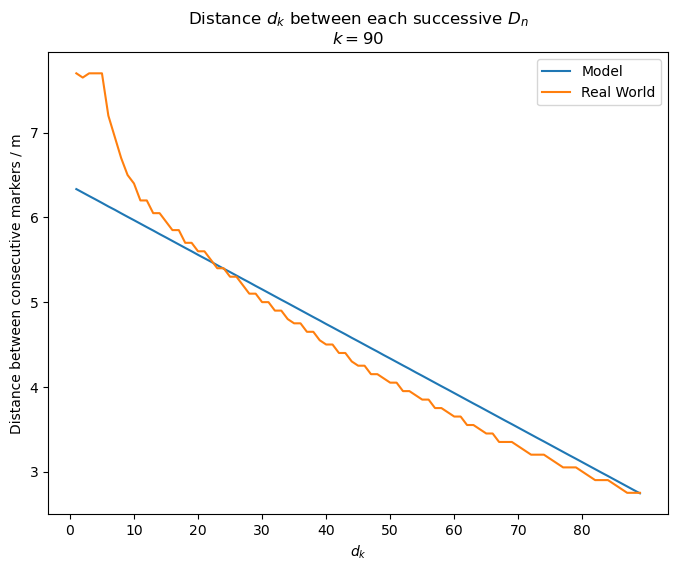

In [24]:
functions.plot_graph_dk(dk_90_no_thinking, real_world_90)

#### Transverse Bars, $n=90$, With thinking time

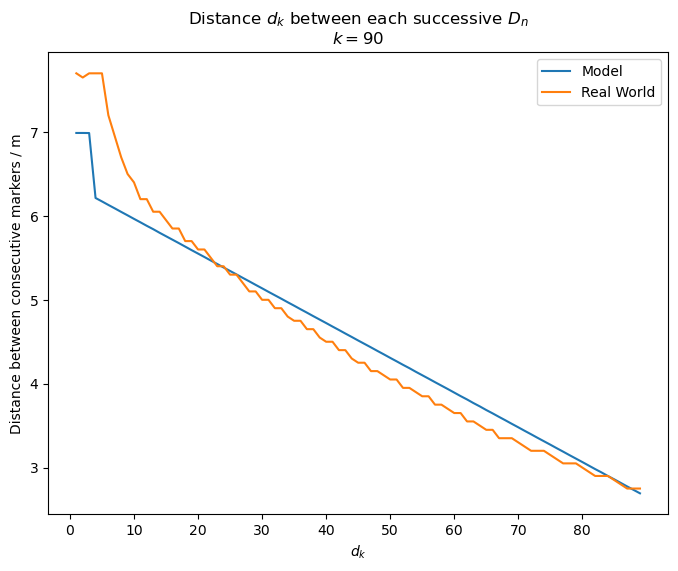

In [25]:
functions.plot_graph_dk(dk_90_thinking, real_world_90)

#### Transverse Bars, $n=45$, No thinking time

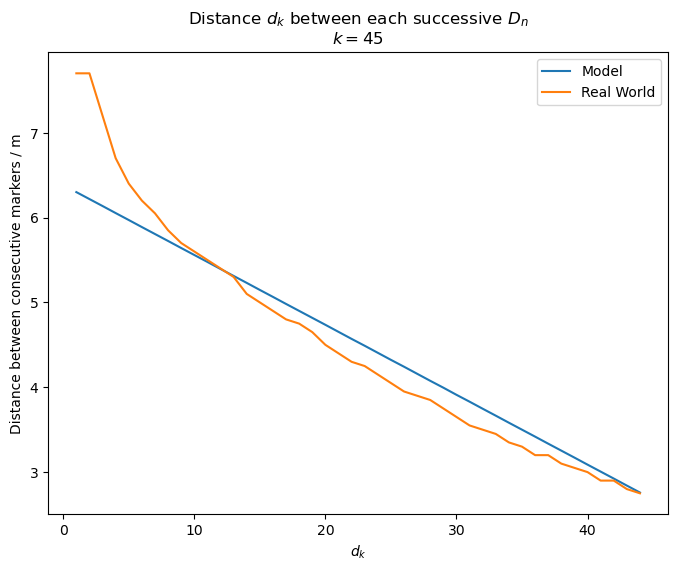

In [26]:
functions.plot_graph_dk(dk_45_no_thinking, real_world_45)

#### Transverse Bars, $n=45$, With thinking time

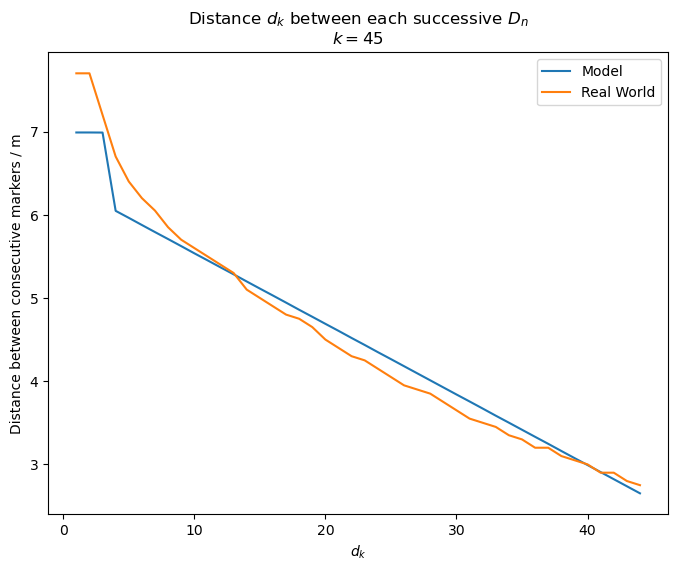

In [27]:
functions.plot_graph_dk(dk_45_thinking, real_world_45)

----
&nbsp;
##### Side by side plots

#### Transverse Bars, $n=90$
&nbsp;
Requires Lists

- `dk_90_no_thinking`
- `dk_90_thinking`
- `real_world_90`


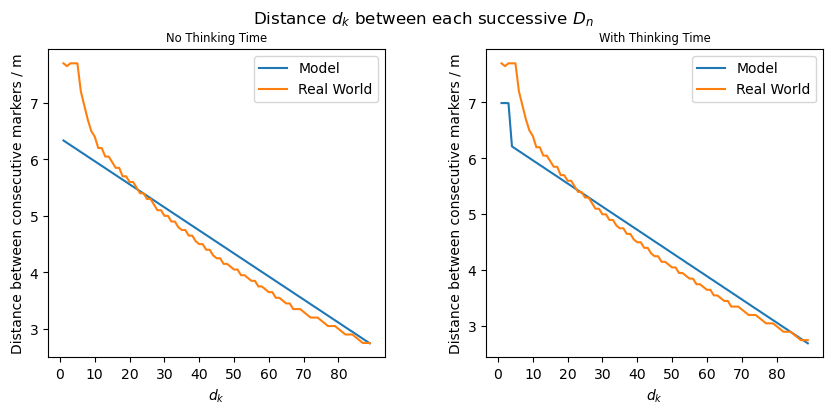

In [28]:
functions.plot_subgraphs_dk(dk_90_no_thinking, dk_90_thinking, real_world_90)

#### Transverse Bars, $n=45$
&nbsp;
Requires Lists

- `dk_45_no_thinking`
- `dk_45_thinking`
- `real_world_45`


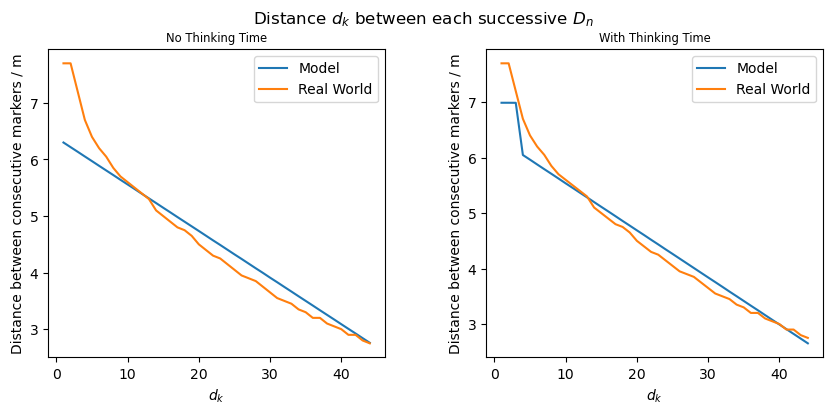

In [29]:
functions.plot_subgraphs_dk(dk_45_no_thinking, dk_45_thinking, real_world_45)

----

## Random values

What if,

- $u=80$ mph
- $v=20$ mph
- $D=200$ m
- $n=20$
- thinking time $=2$ s

In [30]:
functions.metres_per_second(80, 30)

80 mph is 35.763 metres per second
30 mph is 13.411 metres per second


In [31]:
random = functions.calculate_distances(u=35.763, v=13.411, D=200, n=20, thinking_time=2, use_thinking_distance=True)
random_dk = functions.distance_dk(random)

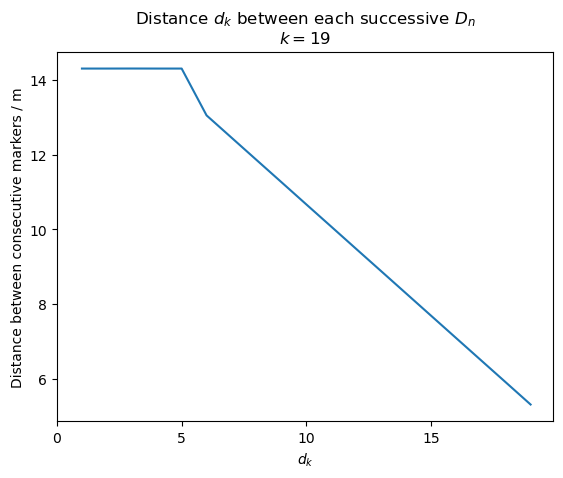

In [32]:
functions.plot_single_dk(random_dk)

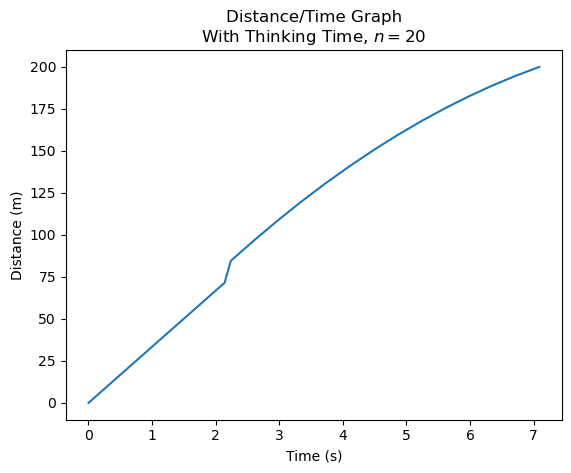

20 [[0.0, 0], [0.428, 14.305], [0.856, 28.61], [1.284, 42.916], [1.713, 57.221], [2.141, 71.526], [2.239, 84.576], [2.613, 97.03], [2.986, 108.888], [3.359, 120.151], [3.732, 130.817], [4.106, 140.888], [4.479, 150.362], [4.852, 159.241], [5.225, 167.524], [5.599, 175.211], [5.972, 182.302], [6.345, 188.797], [6.718, 194.697], [7.091, 200.0]]


(None, None)

In [33]:
functions.distance_time_graph(u=35.763, v=13.411, D=200, n=20, thinking_time=2, use_thinking_distance=True)

#### There's a noticeable discontinuity when we switch from constant velocity to constant deceleration

----

## Distance over time

### Distance/Time Graphs $n=90$

With the `Thinking Distance` model there are two values of $\delta t$

In [30]:
functions.get_delta_t(u=31.293, v=13.411, D=403.95, n=90, thinking_time=0.67, use_thinking_distance=True)

Delta_t1: 0.203059
Delta_t2: 0.199235


(0.203059, 0.199235)

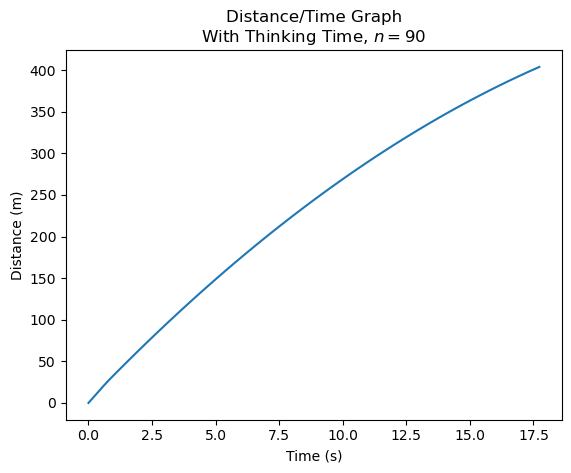

90 [[0.0, 0], [0.203, 6.989], [0.406, 13.978], [0.609, 20.966], [0.797, 27.18], [0.996, 33.353], [1.195, 39.484], [1.395, 45.574], [1.594, 51.622], [1.793, 57.629], [1.992, 63.594], [2.192, 69.518], [2.391, 75.4], [2.59, 81.242], [2.789, 87.041], [2.989, 92.799], [3.188, 98.516], [3.387, 104.192], [3.586, 109.826], [3.785, 115.418], [3.985, 120.969], [4.184, 126.479], [4.383, 131.947], [4.582, 137.374], [4.782, 142.759], [4.981, 148.103], [5.18, 153.406], [5.379, 158.667], [5.579, 163.887], [5.778, 169.065], [5.977, 174.202], [6.176, 179.297], [6.376, 184.351], [6.575, 189.364], [6.774, 194.335], [6.973, 199.265], [7.172, 204.153], [7.372, 209.0], [7.571, 213.805], [7.77, 218.569], [7.969, 223.292], [8.169, 227.973], [8.368, 232.613], [8.567, 237.211], [8.766, 241.768], [8.966, 246.283], [9.165, 250.757], [9.364, 255.19], [9.563, 259.581], [9.763, 263.931], [9.962, 268.239], [10.161, 272.506], [10.36, 276.731], [10.559, 280.916], [10.759, 285.058], [10.958, 289.159], [11.157, 293.219],

(None, None)

In [31]:
functions.distance_time_graph(u=31.293, v=13.411, D=403.95, n=90, thinking_time=0.67, use_thinking_distance=True)

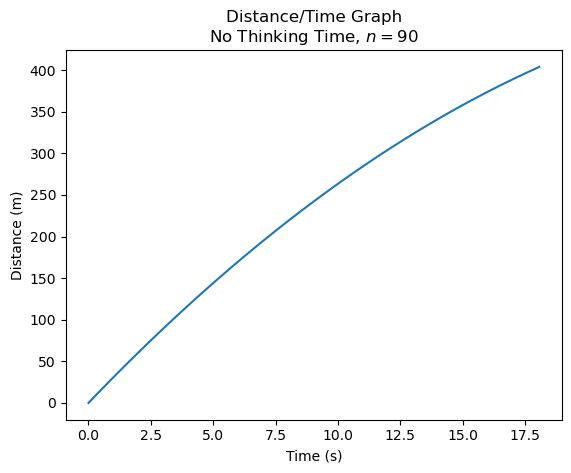

90 [[0.0, 0.0], [0.203, 6.334], [0.406, 12.627], [0.609, 18.879], [0.812, 25.091], [1.015, 31.262], [1.218, 37.391], [1.421, 43.481], [1.624, 49.529], [1.828, 55.536], [2.031, 61.503], [2.234, 67.429], [2.437, 73.314], [2.64, 79.159], [2.843, 84.962], [3.046, 90.725], [3.249, 96.447], [3.452, 102.128], [3.655, 107.768], [3.858, 113.368], [4.061, 118.926], [4.264, 124.444], [4.467, 129.922], [4.67, 135.358], [4.873, 140.753], [5.076, 146.108], [5.28, 151.422], [5.483, 156.695], [5.686, 161.928], [5.889, 167.119], [6.092, 172.27], [6.295, 177.38], [6.498, 182.449], [6.701, 187.477], [6.904, 192.465], [7.107, 197.412], [7.31, 202.318], [7.513, 207.183], [7.716, 212.007], [7.919, 216.791], [8.122, 221.533], [8.325, 226.235], [8.528, 230.896], [8.732, 235.517], [8.935, 240.096], [9.138, 244.635], [9.341, 249.133], [9.544, 253.59], [9.747, 258.007], [9.95, 262.382], [10.153, 266.717], [10.356, 271.011], [10.559, 275.264], [10.762, 279.477], [10.965, 283.648], [11.168, 287.779], [11.371, 291.

(None, None)

In [32]:
functions.distance_time_graph(u=31.293, v=13.411, D=403.95, n=90)

### Distance/Time Graphs $n=45$

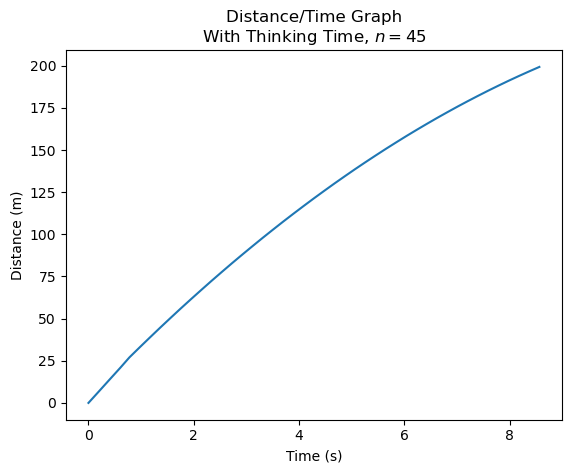

In [33]:
functions.distance_time_graph(u=31.293, v=13.411, D=199.30, n=45, thinking_time=0.67, use_thinking_distance=True)

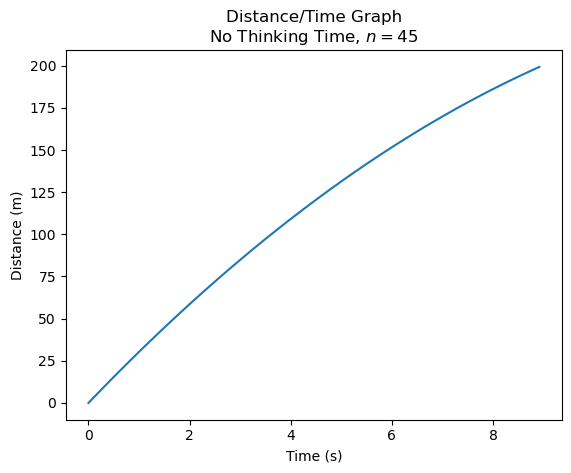

In [34]:
functions.distance_time_graph(u=31.293, v=13.411, D=199.30, n=45)

----

## Velocity over time

### Velocity/Time Graphs $n=90$

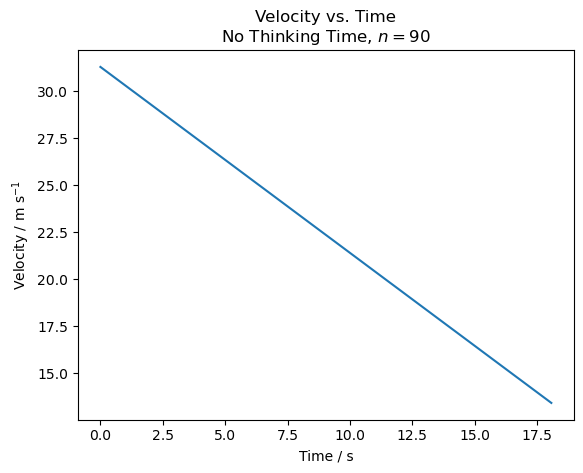

In [35]:
functions.velocity_time_graph(u=31.293, v=13.411, D=403.95, n=90)

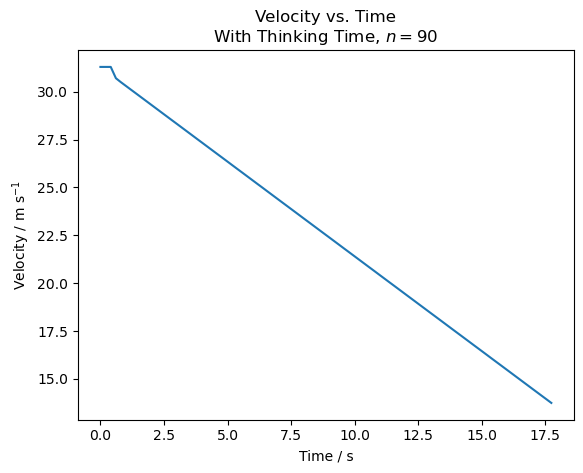

In [36]:
functions.velocity_time_graph(u=31.293, v=13.411, D=403.95, n=90, thinking_time=0.67, use_thinking_distance=True)

### Velocity/Time Graphs $n=45$

This time interval is not realistic...
Need to find out what constitutes speed limit on a 'slip road'

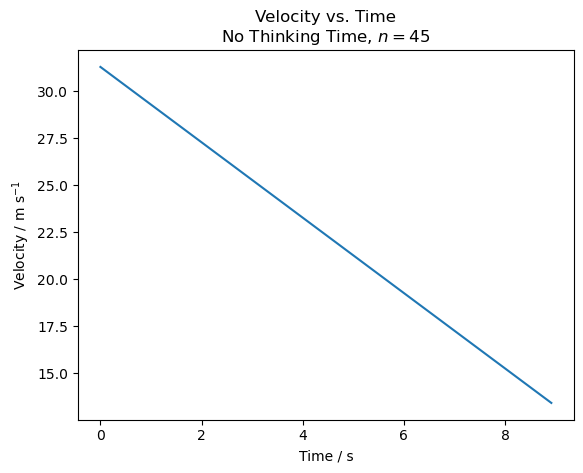

In [37]:
functions.velocity_time_graph(u=31.293, v=13.411, D=199.30, n=45)

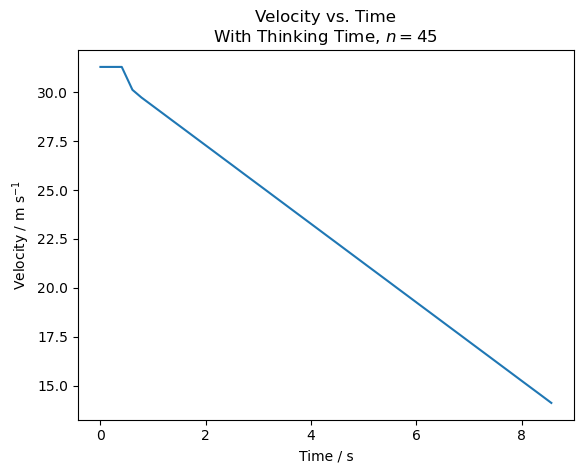

In [38]:
functions.velocity_time_graph(u=31.293, v=13.411, D=199.30, n=45, thinking_time=0.67, use_thinking_distance=True)

----


## Creating dataframes <a class="anchor" id="section-5"></a>

#### Transverse Bars, $n=90$
&nbsp;
Requires Lists

- `dk_90_no_thinking`
- `dk_90_thinking`
- `real_world_90`

In [34]:
df_90 = functions.dataframe(real_world_90, dk_90_thinking, dk_90_no_thinking)

In [35]:
df_90.head()

,d_k,real_world,thinking,no_thinking
0,d1,7.70,6.989,6.334
1,d2,7.65,6.989,6.293
2,d3,7.70,6.988,6.252
3,d4,7.70,6.214,6.212
4,d5,7.70,6.173,6.171


#### Transverse Bars, $n=45$
&nbsp;
Requires Lists

- `dk_45_no_thinking`
- `dk_45_thinking`
- `real_world_45`

In [36]:
df_45 = functions.dataframe(real_world_45, dk_45_thinking, dk_45_no_thinking)

In [37]:
df_45.head()

,d_k,real_world,thinking,no_thinking
0,d1,7.7,6.989,6.300
1,d2,7.7,6.989,6.218
2,d3,7.2,6.988,6.136
3,d4,6.7,6.047,6.053
4,d5,6.4,5.963,5.971


----


## Summary statistics <a class="anchor" id="section-6"></a>

90 Transverse bars


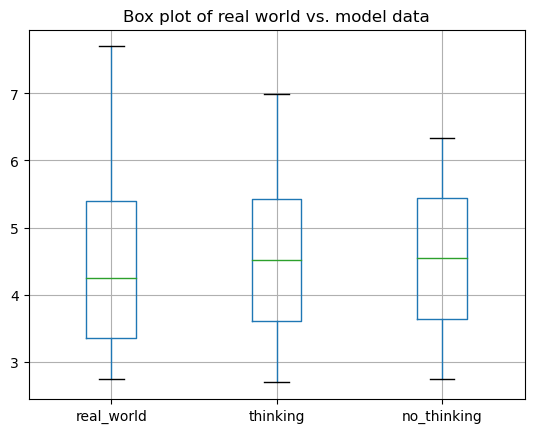


Summary Statistics:

       real_world   thinking  no_thinking
count   89.000000  89.000000    89.000000
mean     4.538764   4.538764     4.538764
std      1.367661   1.115943     1.054079
min      2.750000   2.693000     2.744000
25%      3.350000   3.604000     3.641000
50%      4.250000   4.515000     4.539000
75%      5.400000   5.427000     5.436000
max      7.700000   6.989000     6.334000


(None, None, None)

In [38]:
functions.stats(df_90)

45 Transverse bars


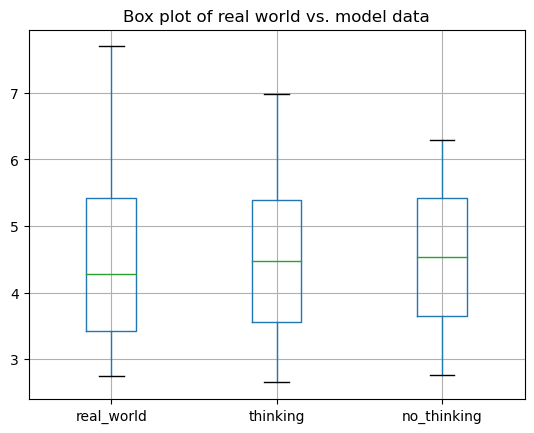


Summary Statistics:

       real_world   thinking  no_thinking
count   44.000000  44.000000    44.000000
mean     4.529545   4.529545     4.529545
std      1.352703   1.189267     1.057895
min      2.750000   2.652000     2.759000
25%      3.425000   3.564000     3.644250
50%      4.275000   4.477000     4.529500
75%      5.425000   5.389250     5.414750
max      7.700000   6.989000     6.300000


(None, None, None)

In [39]:
functions.stats(df_45)